# 1. Проблема

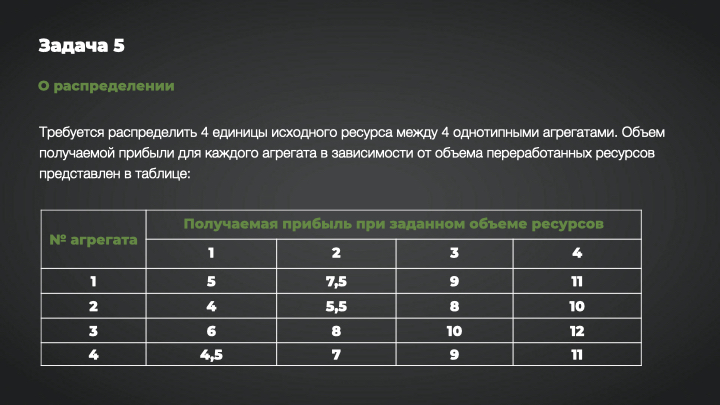

# 2. Содержательная постановка

1. Составить план работы агрегатов для получения максимальной прибыли, используя приведенную таблицу объема получаемой прибыли.

2. Посчитать максимальную прибыль.

# 3. Формальная постановка

Пусть 

- $X = ||x_{ij}||$ - двумерное пространство использования заданных объемов.

- $C = ||c_{ij}||$ - двумерное пространство прибыли при заданном объеме ресурсов.

- $W = (w_1,w_2,w_3,w_4)$ - пространство весов объемов

Тут 

- $i$ - объем ресурсов

- $j$ - номер агрегата

Задача:

$$
\sum\limits_{i=1}^4\sum\limits_{j=1}^4c_{ij}x_{ij} \rightarrow \max
$$

Ограничения нормированности по ГОСТу (условия):

$
\forall i,j:\ 0 \leq x_{ij} \leq 1
$ - неотрицательность числа использования объемов и невозможность использовать объем больше 1 раза

$
\sum\limits_{i=1}^4\sum\limits_{j=1}^4 x_{ij}w_i \leq 4
$ - ограничение на общий объем

# 4. Алгоритм и ПО

В качестве ПО будем использовать ЯП **Python** с подключенными модулями:

- **numpy** - для работы с линейной алгеброй

- **cvxpy** - для работы с линейным программированием

В качестве среды разработки **Jupyter Lab**,

# 5. Решение

Приведем в качестве решения скрипт:

In [ ]:
def profit(c,w=None,resource_limit=4, accuracy=1):
    '''
    Функция, подсчитывающая объем получаемой прибыли
    при использовании оптимального распределения
    работы агрегатов, а также план их работы
    
    c - 2D-список
    получаемой прибыли при
    заданном объеме ресурсов
    для агрегатов
    
    w - список
    весов объемов
    (по умолчанию массив чисел от 1 до n, где n - число вариантов)
    
    resource_limit - число
    ресурсов, которое можно использовать
    
    accuracy - число
    запятых, которе оставляем после запятой
    '''
    
    import cvxpy
    import numpy as np
    
    c = np.array(c)
    shp = np.shape(c)
    if w is None:
        w = np.array([i for i in range(1,shp[1]+1)]*shp[0]).reshape(shp)
    x = cvxpy.Variable(shape=shp, integer = True)
    
    constraints = [(x >= 0),
                   (x <= 1),
                   (cvxpy.sum(cvxpy.multiply(w, x)) <= resource_limit)]

    total_value = -cvxpy.sum(cvxpy.multiply(c, x))
    problem = cvxpy.Problem(cvxpy.Minimize(total_value), constraints=constraints)
    
    print('Макимальная прибыль: {}$'.format(abs(round(problem.solve(),accuracy))))
    
    print('\nМатрица распределения работы агрегатов:\n')
    for i in range(len(x.value)):
        print(' '.join([str(j) for j in x.value[i].astype(int)]))
    
    return (abs(problem.solve()))

# 6. Анализ

Запустим скрипт на наших данных:

In [ ]:
c = [[5,7.5,9,11],
     [4,5.5,8,10],
     [6,8,10,12],
     [4.5,7,9,11]]

profit(c);

Макимальная прибыль: 19.5$

Матрица распределения работы агрегатов:

1 0 0 0
1 0 0 0
1 0 0 0
1 0 0 0


Получаем максимальную суммарную прибыль в 

$19.5\$$

Получаем распределение работы агрегатов по объему ресурсов:

$\begin{pmatrix}
1 & 0 & 0 & 0 \\
1 & 0 & 0 & 0 \\
1 & 0 & 0 & 0 \\
1 & 0 & 0 & 0
\end{pmatrix}$

Видим вполне логичный результат. Из самой таблицы видно, что лучше всего использовать все агрегаты по одному разу.